This is a notebook supposed to serve as a 0-basic understanding of machine learning in python
using Titanic data from Kaggle
I will be importing packages section by section, instead of at the top. Bad practice, but more readable.
This will be broken into the following sections:
### I. Basics of Pandas
### II. Pandas dataframe tools
### III. Visualizations with Seaborn
### IV. Filling *nan* values, creating new features, and numericalizing
### V. Machine Learning: Randomforest classifier demo
### VI: xgboost demo

## I: Basics of Pandas
   Before Beginning I assume the raw data from Kaggle has already been downloaded.
   It can be found here: https://www.kaggle.com/c/titanic/data
   Also on kaggle are tutorials using the same data for excel, python, python+Pandas, and R.
   They are probably better written than this, so you should check them out.
   
   In this section, I will be using the _pandas_ package.
     * Pandas:  I find panads very useful for dealing with data which is in a table format.
                You can give each table column a header, which can be called instead of the column number.
                This is easier to remember and more intuitive.
     

In [1]:
import pandas as pd #pandas is a useful array/matrix/spreadsheet maipulator. But it has some unique language

In [2]:
#First I import training data into a pandas dataframe.
#header=0 tells Pandas to make first row the labels for each column and not include them in the dataframe values
Train=pd.read_csv('train.csv', header=0)
print(len(Train))

891


We can look at the first few rows of pandas dataframe we just created using the .head(n) command.
where n==number of rows to observe. If left blank pandas will guess how many you want

In [3]:
Train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now I will look at the test data. Often the test set has only a subset of the columns in the training set. Those extra training set columns are useless to train on, so we might as well drop them. Also, I like to combine my train and test sets together from the start. This way any *null* replacements, new feature generation, or numericalizing only has to be coded for once.

In [4]:
Test=pd.read_csv('test.csv', header=0)

In [5]:
Test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


There is only 1 column missing from the testing data compare to the training data: **Survived**

Not suprising, that's what we want to find. For now I'll add a dummy variable into the test set.

In [6]:
Test.insert(1,'Survived',-1,allow_duplicates=False)

In [7]:
Test.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,-1,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,-1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


Now I combine the two dataframes and reset the row index.

In [8]:
Data=pd.concat([Train,Test])
Data=Data.reset_index(drop=True)

In [9]:
Data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [10]:
Data.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1307,1308,-1,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,-1,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# II. Pandas dataframe tools

Before going on, let's look at a few ways we can glean information about our data using built in pandas commands

**.dtypes** gives us information about the types of data each column has. Generally, numbers are better and objects/strings are worse for machine learning. Eventually we will be making everything into numbers

In [11]:
Data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**.describe()** can give us basic statistics on any column that is a number

In [12]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,-0.058060,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.760044,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,-1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,-1.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


**.info()** Gives yet more information. Importantly, it points out if there are _null_ values for any rows in each column. Those can give a machine learning algorithm errors, so it's good to clean those up beforehand 

In [13]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


So above, **RandIndex** tells us how many rows exist in the dataframe. We see **Age**, **Fare**, **Cabin**, and **Embarked** all have some number of null values. We will need to fix those eventually.

We can also look at subsets of the data, cutting by rows or columns. There are several ways to do this.

option 1: **dataframe.feature**   (`Data.Sex`)

option 2: **dataframe['feature']**  (`Data['Sex']`)

option 3: **dataframe.loc[row_indexes, column_names]**  (`Data.loc[:,'Sex']`)

I have had problems with options 1 and 2 in the past, especially in more complex loops. I suggest taking the extra quarter second to type **.loc** and use option 3.

Look at a single column:

In [14]:
Data.loc[0:9,'Sex']

0      male
1    female
2    female
3    female
4      male
5      male
6      male
7      male
8    female
9    female
Name: Sex, dtype: object

Look at dataframe conditioned on certain values in single column:

In [15]:
Data[Data.loc[:,'Sex']=='male'].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


You can also condition on more than 1 feature value

In [16]:
YoungMales=Data[(Data.loc[:,'Sex']=='male')&(Data.loc[:,'Age']<=35)]
YoungMales.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.050,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q


Sidenote: If you take a subset of a dataframe, the row index stays fixed. For example in the new dataframe **YoungMales** defined above, asking for the first 10 rows will only give you 3:

In [17]:
YoungMales.loc[0:9,['Survived', 'Pclass','Sex']]

,Survived,Pclass,Sex
0,0,3,male
4,0,3,male
7,0,3,male


You can reindex to get rid of this problem, but watch out if you try to return this subset to the larger dataframe.

In [18]:
YoungMales=YoungMales.reset_index(drop=True)
YoungMales.loc[0:9,['Survived', 'Pclass','Sex']]

,Survived,Pclass,Sex
0,0,3,male
1,0,3,male
2,0,3,male
3,0,3,male
4,0,3,male
5,0,2,male
6,1,2,male
7,1,1,male
8,0,1,male
9,0,1,male


# III: Visualizing the data with seaborn

Now I would like to take some time to make some visualizations to give us some intuition on how to proceed with the machine learning.  I will be using the **seaborn** package.
     * Seaborn: I find seaborn can make very professional looking visualizations quickly. 
                Plus, it works well with Pandas

In [19]:
%matplotlib inline
import seaborn as sns

### Seaborn countplot
The countplot works best with categorial features that have some fairly small number of different values.
I can see how common each value is:

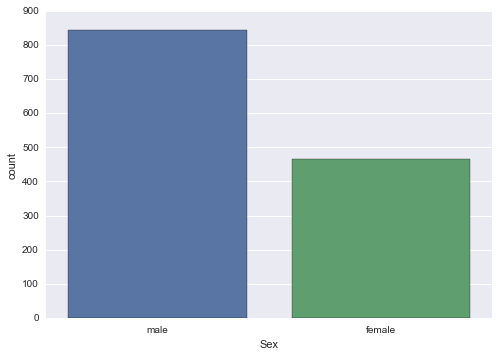

In [20]:
sns.countplot(x="Sex",data=Data)

I can also beak up the counts based on the value in some other column

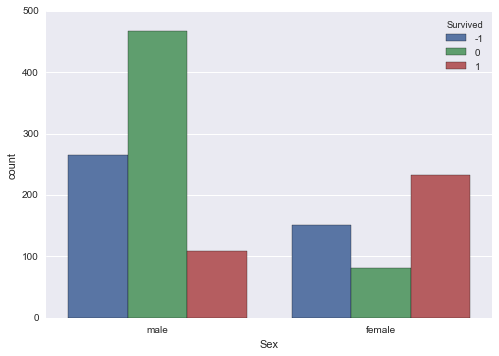

In [21]:
sns.countplot(x="Sex", hue='Survived',data=Data)

(remember Survived=-1 means the data comes from the Test set, which had no Survived column.)

Or look at subsets of the dataframe

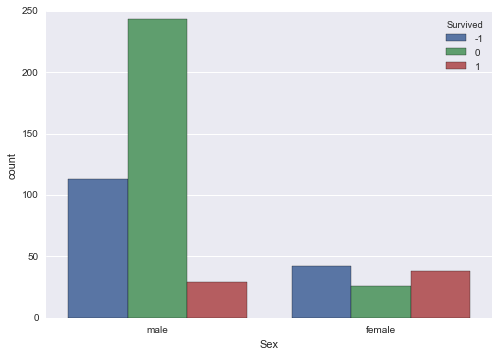

In [22]:
sns.countplot(x="Sex", hue='Survived',data=Data[Data.loc[:,'Fare']<10])

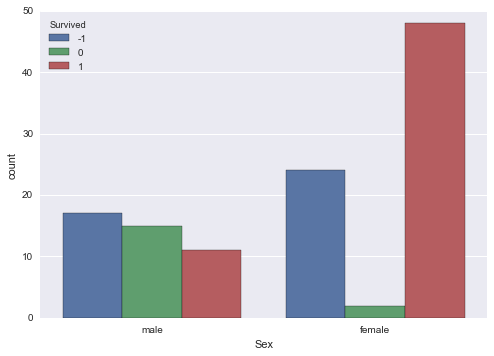

In [23]:
sns.countplot(x="Sex", hue='Survived',data=Data[Data.loc[:,'Fare']>=80])

There are many other cool visualizations you can do with seaborn, but I'm going to just show one more: the **swarmplot**. It can take a long time to generate if given too much data, hense the random subsample used below, but can create pretty interesting plots.

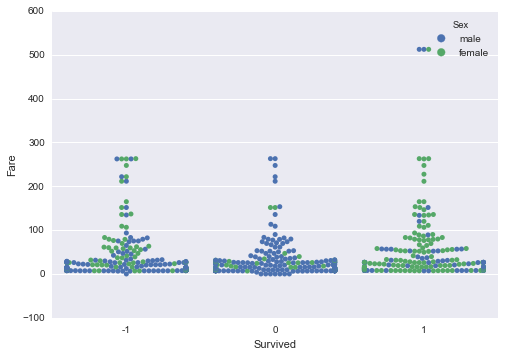

In [24]:
sns.swarmplot(x="Survived", y="Fare", hue="Sex", data=Data.sample(750));

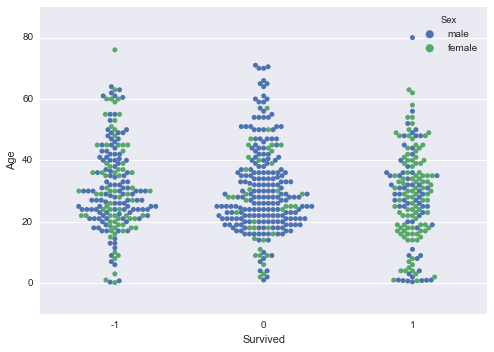

In [26]:
sns.swarmplot(x="Survived", y="Age", hue="Sex", data=Data.sample(750));

#  IV. Filling *nan* values, creating new features, and numericalizing

In these next steps, I will be making several new columns for features that have either been corrected somehow, binned, numericalized, etc. I could choose just to overwrite the original feature when I do these things. But for this sized dataset, I'd much prefer to not lose the information in those originals in case I want to go back to them without rerunning this entire notebook.

In this section I import the **re** package. 
  * I'm using **re** for it's ability to split strings using multiple delimiters.

If we recall from the **.info** from above, there were *nan* values in 4 features: **Age, Fare, Cabin,** and **Embarked**. Let's deal with these in a few different ways.

for **Age** and **Fare**, let's just set the *nan* values equal to the median value of the features

In [40]:
print(Data.Age.describe()['50%'])
print(Data.Fare.describe()['50%'])

28.0
14.4542


First, I'll make a new feature:

In [41]:
Data['Age_Complete']=Data['Age']

Then I'll fill the *nan* values with my chosen value:

In [42]:
Data['Age_Complete'].fillna(28,inplace = True);

Repeat for Fare:

In [43]:
Data['Fare_Complete']=Data['Fare'];
Data['Fare_Complete'].fillna(14.45,inplace=True)

**Embarked** feature type consists of strings, not numbers, but we can still play the same game

In [63]:
Data.loc[:,'Embarked'].describe()['top']

'S'

In [64]:
Data['Embarked_Complete']=Data['Embarked'];
Data['Embarked_Complete'].fillna('S',inplace=True)

**Cabin** has only 295 non-null objects for over 1300 entries. Instead of trying to fill every *nan* value, I'll make a new feature for whether or not a cabin was listed for the passenger.

In [53]:
Data['Cabin_bin']=1

In [56]:
Data.loc[pd.isnull(Data.loc[:,'Cabin']),'Cabin_bin']=0

In [59]:
Data[['Cabin','Cabin_bin']].head()

,Cabin,Cabin_bin
0,NaN,0
1,C85,1
2,NaN,0
3,C123,1
4,NaN,0


### Binning data

Several of the features poorly suited to being used for machine learning because there is so much variance in the feature set. For example, **Name** has 1307 unique entries out of 1309 possibles. I can either drop such a feature, or find a way to bin it to make it more meaningful.

Here I cut the name data a few different ways as examples. The actual usefulness of these cuts is up for debate.

First, I take a look as a few names:

In [146]:
Data.loc[0:9,['Name','Age']]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
5,"Moran, Mr. James",NaN
6,"McCarthy, Mr. Timothy J",54.0
7,"Palsson, Master. Gosta Leonard",2.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0


The first thing that jumps out at me is that each person has a title. I can make that title it's own variable. I use a for loop, which won't work for any large dataset, but is fine for this. I also import the module **re** which lets me define how to split the name so to extract the title.

In [147]:
import re
Data['Title']=''
for x in range(0,len(Data)):
    Data.loc[x,'Title']=re.split(r'[,.]\s*',Data.loc[x,'Name'])[1]

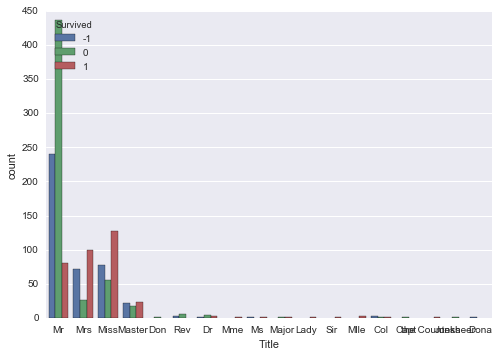

In [157]:
sns.countplot(hue='Survived',x='Title',data=Data)

I'll go ahead and make one more new feature out of the **Name**. For fun, let's look at length of last name

In [164]:
Data['Name_Length']=0;
for x in range(0,len(Data)):
    Data.loc[x,'Name_Length']=len(re.split(r'[,.]\s*',Data.loc[x,'Name'])[0])

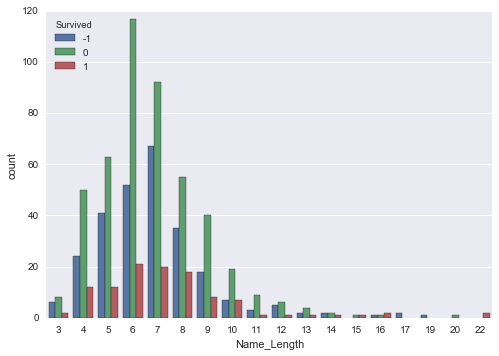

In [166]:
sns.countplot(hue='Survived',x='Name_Length',data=Data[Data['Sex']=='male'])

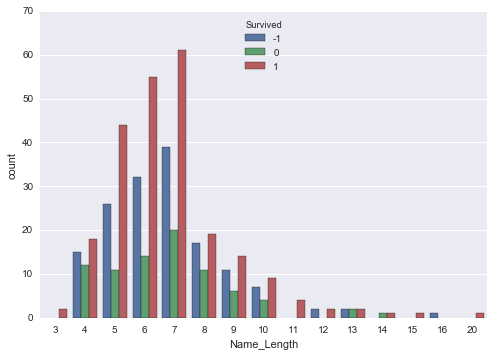

In [167]:
sns.countplot(hue='Survived',x='Name_Length',data=Data[Data['Sex']=='female'])

I'll also quickly bin **Age** and **Fare**, using some educated guesses

I can use Pandas *cut* and *qcut* to bin the data for this first pass. 
  * *cut* bins in equally spaced bins
  * *qcut* bins in equally deep bins

In [847]:
n=10
Data['Age_bin']=pd.cut(Data['Age_Complete'], n, labels=list(range(n)), retbins=False, precision=3).values

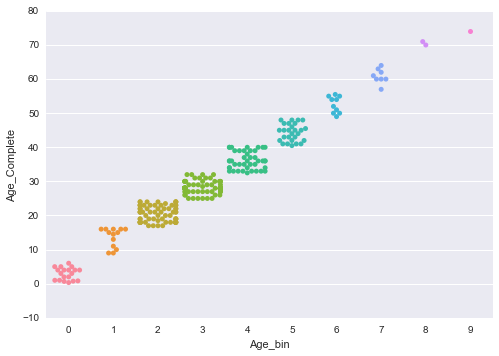

In [851]:
sns.swarmplot(x="Age_bin", y="Age_Complete", data=Data.sample(300));

In [854]:
n=10
Data['Fare_bin']=pd.qcut(Data['Fare_Complete'], n, labels=list(range(n)), retbins=False, precision=3).values

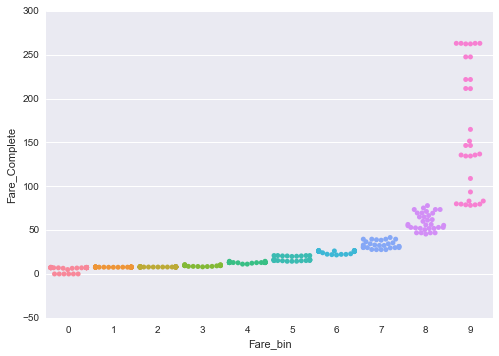

In [855]:
sns.swarmplot(x="Fare_bin", y="Fare_Complete", data=Data.sample(300));

**Title** needs to be binned as well, as many of those titles aren't really useful. Let's bin everything after master as *other* (Or, because I'll just be making them numbers in the next section anyway, let me cheat and do that now.)

In [890]:
Data['Title_Num']=Data['Sex_Num']+5;
x=0
for elm in Data.loc[:,'Title'].unique()[0:4]:
    Data.loc[Data[Data['Title']==elm].index,'Title_Num']=x
    x=x+1

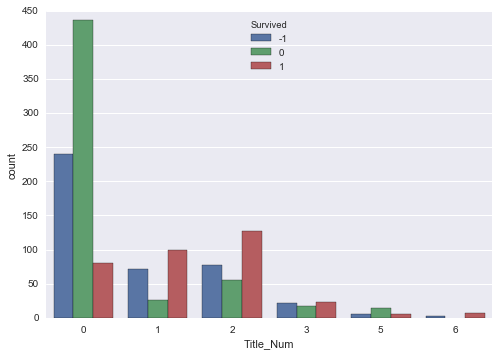

In [891]:
sns.countplot(x='Title_Num',hue='Survived',data=Data)

### Numericalizing the features that will go into the model

Now I get around to making everything a number. Most machine learning algorithms do better with numbers than with strings (in addition to having problems with *nan* values).  I'll only focus on the features I want in the final model.

In [892]:
Data2=Data[['PassengerId','Survived','Pclass','Sex','SibSp','Parch','Cabin_bin',
      'Embarked_Complete','Title_Num','Name_Length','Age_Bin','Fare_Bin']]
Data2.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Cabin_bin,Embarked_Complete,Title_Num,Name_Length,Age_Bin,Fare_Bin
0,1,0,3,male,1,0,0,S,0,6,2,0
1,2,1,1,female,1,0,1,C,1,7,2,2
2,3,1,3,female,0,0,0,S,2,9,2,0
3,4,1,1,female,1,0,1,S,1,8,2,2
4,5,0,3,male,0,0,0,S,0,5,2,0


### Numericalizing the data

Many features are already numericalized (I know it's a made-up word). I just have to worry about **Sex** and **Embarked_Complete**. I'll use a technique similar to how I binned **Age** and **Fare**.

In [857]:
Data['Sex_Num']=9;
x=0
for elm in Data.loc[:,'Sex'].unique():
    Data.loc[Data[Data['Sex']==elm].index,'Sex_Num']=x
    x=x+1

In [858]:
Data['Embarked_Num']=9;
x=0
for elm in Data.loc[:,'Embarked_Complete'].unique():
    Data.loc[Data[Data['Embarked_Complete']==elm].index,'Embarked_Num']=x
    x=x+1

In [861]:
Data3=Data[['PassengerId','Survived','Pclass','SibSp','Parch','Cabin_bin',
      'Name_Length','Age_Bin','Fare_Bin','Sex_Num','Embarked_Num','Title_Num']]
Data3.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Cabin_bin,Name_Length,Age_Bin,Fare_Bin,Sex_Num,Embarked_Num,Title_Num
0,1,0,3,1,0,0,6,2,0,0,0,0
1,2,1,1,1,0,1,7,2,2,1,1,1
2,3,1,3,0,0,0,9,2,0,1,0,2
3,4,1,1,1,0,1,8,2,2,1,0,1
4,5,0,3,0,0,0,5,2,0,0,0,0


# Machine Learning (Finally!)

After all that, I can finally do some machine learning. For certain algorithms (neural networks, logistic regression), I might need to make my data into a sparce, boolean  matrix where every column has entries that are purly 1 or 0. e.g **Pclass** would need to become 2-3 different columns (**Pclass1**, **Pclass2**, **Pclass3**) where for a given index value *x* only one of the new columns would have a numerical entry 1 related to the value in **Pclass**.

However, the machine learning algorithms I'm using right now don't need that done by the user beforehand.

I import the modules **sklearn.ensemble** and **matplotlib.pyplot**
*  **sklearn.ensemble** is my machine learning random forest.
*  **matplotlib.pyplot** is another plotting module. I could have used seaborn, but already had this written in pyplot.

First up, sklearn and the randomforestclassifier

In [240]:
from sklearn.ensemble import RandomForestClassifier #machine learning package.
import matplotlib.pyplot as plt #plotting package.

Just restating for the record the features I am including. For now I will step through each process of training the forest, but afterwards I may try writing an optimization algorithm.

In [862]:
Data3=Data[['PassengerId','Survived','Pclass','SibSp','Parch','Cabin_bin',
      'Name_Length','Age_Bin','Fare_Bin','Sex_Num','Embarked_Num','Title_Num']]

Before we go any farther, we need to seperate the training set from the test set.

In [863]:
train_data=Data3[Data3['Survived']>=0]
test_data=Data3[Data3['Survived']<0]

One of the things I like to have is a cross validation (CV) set. This is a small portion of the original training set that is held back from the machine learning algorithm. After the algorithm is trained, the CV set can be run through the algorithm. Because it wasn't used to train the set, it should do a better job acting like a test set. But because it came from the original training set, I can still compare to known correct solutions.

In [908]:
n=len(train_data);
nTrain=int(n*.8)
nCV=n-nTrain
subTrain1=train_data.sample(n) #randomly mixes the training set
trainingset=subTrain1[0:nTrain] #puts 80% of set into new training set
CVset=subTrain1[nTrain:] #puts remaining 20% into CV set

In [909]:
train=trainingset.values; #new training set is smaller because we've removed CV data.
cv=CVset.values;

All the machine learning, contained in 1 cell...

In [910]:
forest=RandomForestClassifier(n_estimators=10) #100 trees in this forrest. All other parameters default.
#train[0::,2::] all features besides ID and Survived
#train[0::,1] Survived column for training.
forest=forest.fit(train[0::,2::],train[0::,1])
#and can find how well the model does with the data that trained it:
output=forest.predict(train[0::,2::])

Above I've predicted on the same set I trained with. So, I'd expect a pretty good match. % correct shown below:

In [911]:
y=0
for x in range(0,len(output)):
    if output[x]==train[x,1]:
        y=y+1
print (1.*y/len(output))

0.925561797752809


But what if I use the CVset?

In [912]:
outputCV=forest.predict(cv[0::,2::])

y=0
for x in range(0,len(outputCV)):
    if outputCV[x]==cv[x,1]:
        y=y+1
print (1.*y/len(outputCV))

0.7988826815642458


Those 2 numbers are fairly far apart from one another. That's a general indication that my model is *overfitting*: too many knobs it can tweak and too few examples in the training set. Probably the best way to fix overfitting is to train on more examples, but on finite data sets like those Kaggle gives, reducing parameters is the next best thing.

Let me show why it's aften best just to throw more examples at an overfitting problem.

After that, I'll show how changing the number of features being placed into the model can also improve results.

### Plan A: Get a larger training set.

Below I have a script that repeatedly trains a forest using training sets that grow with each repetition. The error from predicting with the forest using the same training set and a CV set are recorded in **trainError** nad **cvError** for each size of training set. After all the errors have been measured, the script plots the errors for both the training sets and the cv sets as a function of how many examples were used to train the forest. (Well, 80% were used for the forest, the other 20% were reserved for the CV.)

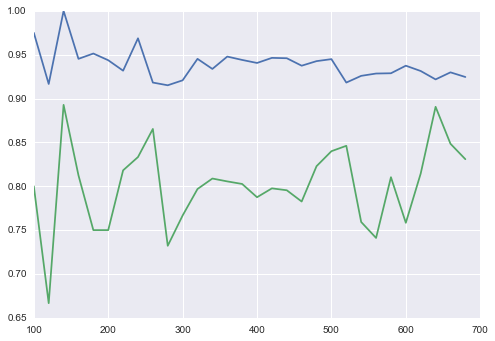

In [913]:
#def errorMapping():
trainError=[];
cvError=[];
counts=[];
for n in range(100,700,20):
    #n=len(train_data);
    nTrain=int(n*.8);
    nCV=n-nTrain;
    subTrain1=train_data.sample(n) ;
    trainingset=subTrain1[0:nTrain];
    CVset=subTrain1[nTrain:];
    train=trainingset.values;
    cv=CVset.values;
    forest=RandomForestClassifier(n_estimators=10)
    forest=forest.fit(train[0::,2::],train[0::,1])
    output=forest.predict(train[0::,2::]);
    y=0
    for x in range(0,len(output)):
        if output[x]==train[x,1]:
            y=y+1
    trainError.append(1.*y/len(output));
    outputCV=forest.predict(cv[0::,2::])
    y=0
    for x in range(0,len(outputCV)):
        if outputCV[x]==cv[x,1]:
            y=y+1
    cvError.append(1.*y/len(outputCV));
    counts.append(n)
plt.plot(counts,trainError,counts,cvError)

It's hard to see any pattern in that plot because it's so noisy. I now make a definition that does the same thing, but this time trains 10 forests for every sized training set, calculates the resulting error, than uses the average error for the final plot.

In [914]:
def errorMapping(MIN,MAX,STEP,features):
    Data3=Data[['PassengerId','Survived']+features]
    train_data=Data3[Data3['Survived']>=0]
    trainError=[];
    cvError=[];
    counts=[];
    for n in range(MIN,MAX,STEP):
        trainErrorTemp=[];
        cvErrorTemp=[];
        for rep in range(0,10):
            nTrain=int(n*.8);
            nCV=n-nTrain;
            subTrain1=train_data.sample(n) ;
            trainingset=subTrain1[0:nTrain];
            CVset=subTrain1[nTrain:];
            train=trainingset.values;
            cv=CVset.values;
            forest=RandomForestClassifier(n_estimators=10)
            forest=forest.fit(train[0::,2::],train[0::,1])
            output=forest.predict(train[0::,2::]);
            y=0
            for x in range(0,len(output)):
                if output[x]==train[x,1]:
                    y=y+1
            trainErrorTemp.append(1.*y/len(output));
            outputCV=forest.predict(cv[0::,2::])
            y=0
            for x in range(0,len(outputCV)):
                if outputCV[x]==cv[x,1]:
                    y=y+1
            cvErrorTemp.append(1.*y/len(outputCV));
        trainError.append(np.average(trainErrorTemp))
        cvError.append(np.average(cvErrorTemp))
        counts.append(n)
    plt.plot(counts,trainError,counts,cvError)

In [814]:
#Data[['PassengerId','Survived']+['Pclass','SibSp','Parch','Cabin_bin',
#      'Name_Length','Age_Bin','Fare_Bin','Sex_Num','Embarked_Num','Title_Num']]

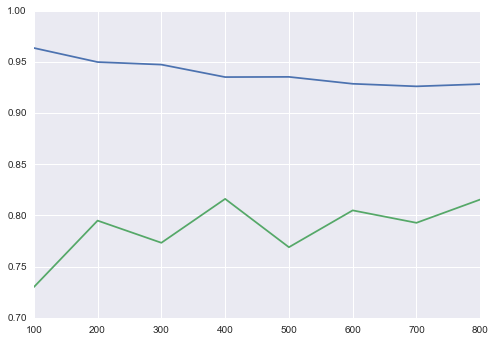

In [916]:
errorMapping(100,900,100,['Pclass','SibSp','Parch','Cabin_bin','Name_Length','Age_Bin',
              'Fare_Bin','Sex_Num','Embarked_Num','Title_Num'])

That reduced some of the noise. You can see the training error is dropping slowly while the CV error is increasing slowly. If we had more training examples, we could feed them into the model and eventually these two curves would possibily meet.

While there is a gap, we know our model is overfitting the training data. If we tried to use this model on a test set, the best we could hope for would be an error around where the CV error is located. However, because the model is still being overfitted, there's a good chance the test error would be even worse.

Unfortunately, (or fortunately) there were only a finite number of people on the Titanic. We will run out of examples before those curves meet. So now I need to start reducing the number of features I use to make my predictions in order to make a more accurate model.

To do that, let me first see how important each parameter is to training my forest:

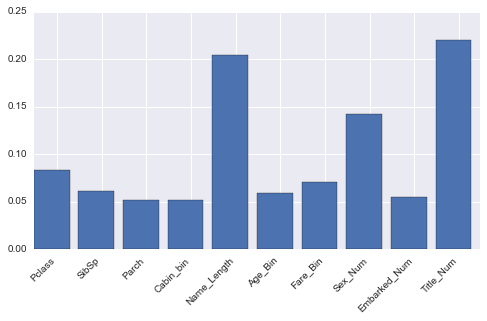

In [898]:
features=list(Data3.columns[2:].values) #the header labels for each feature
horizontal=[]
for x in range(0,len(features)):
    horizontal.append(x);
importance=forest.feature_importances_; #just how important is each feature?
plt.figure(1)
h = plt.bar(horizontal, importance, label=features);
plt.subplots_adjust(bottom=0.3);
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h];
plt.xticks(xticks_pos, features,  ha='right', rotation=45);

Unsurprisingly, the title of the person is the most important feature, with sex not far behind.
Weirdly, Name_Length is also high up there. I'm not sure why, although maybe because it's the most versitile being the feature with the largest number of possible values.

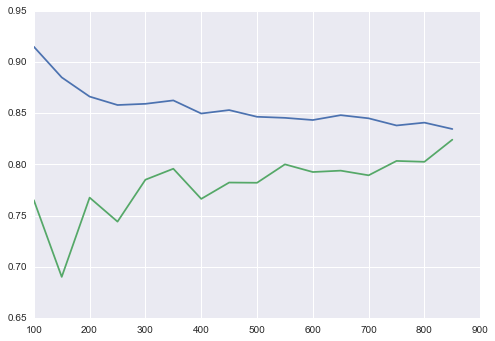

In [907]:
errorMapping(100,891,50,['Title_Num','Name_Length','Sex_Num', 'Pclass'])

Better (I should say I ran that cell a few times to get a particuarly good looking plot!).

### Model tuning

Another way to control for overfitting (or underfitting for that matter) is by controling parameters in your model. 

RandomForestClassifier has a bunch of ways to control how the forest is created and trained. 

You can learn about them all here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

For now, I'll focus on:
*  **n_estimators**: How many trees in the forest
*  **max_features**: Max number of features to look at for each tree at each split
*  **max_depth**: Max number of splits for each tree.

In [917]:
def errorMapping2(MIN,MAX,STEP,features, n_Estimators, max_Features, max_Depth):
    Data3=Data[['PassengerId','Survived']+features]
    train_data=Data3[Data3['Survived']>=0]
    trainError=[];
    cvError=[];
    counts=[];
    for n in range(MIN,MAX,STEP):
        trainErrorTemp=[];
        cvErrorTemp=[];
        for rep in range(0,10):
            nTrain=int(n*.8);
            nCV=n-nTrain;
            subTrain1=train_data.sample(n) ;
            trainingset=subTrain1[0:nTrain];
            CVset=subTrain1[nTrain:];
            train=trainingset.values;
            cv=CVset.values;
            forest=RandomForestClassifier(n_estimators=n_Estimators, max_features=max_Features, max_depth=max_Depth)
            forest=forest.fit(train[0::,2::],train[0::,1])
            output=forest.predict(train[0::,2::]);
            y=0
            for x in range(0,len(output)):
                if output[x]==train[x,1]:
                    y=y+1
            trainErrorTemp.append(1.*y/len(output));
            outputCV=forest.predict(cv[0::,2::])
            y=0
            for x in range(0,len(outputCV)):
                if outputCV[x]==cv[x,1]:
                    y=y+1
            cvErrorTemp.append(1.*y/len(outputCV));
        trainError.append(np.average(trainErrorTemp))
        cvError.append(np.average(cvErrorTemp))
        counts.append(n)
    plt.plot(counts,trainError,counts,cvError)

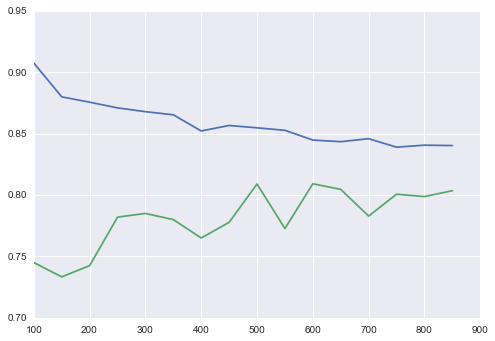

In [928]:
errorMapping2(100,891,50,['Title_Num','Name_Length','Sex_Num', 'Pclass'],10,'auto',None)

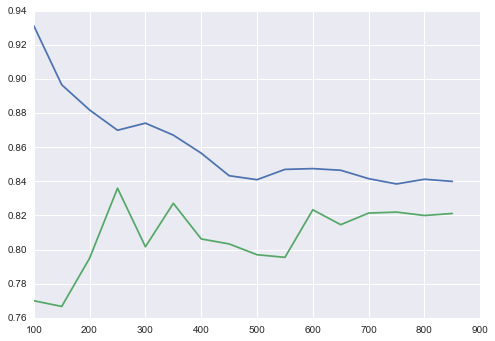

In [930]:
errorMapping2(100,891,50,['Pclass','SibSp','Parch','Cabin_bin','Name_Length','Age_Bin',
              'Fare_Bin','Sex_Num','Embarked_Num','Title_Num'],30,4,4)

Not a lot of improvement, but could help in getting the best optimization.

For larger datasets, keeping your forest at a manageable size for your computer's abilities is also needed. Controling number and depth of trees is one way to do that.

When the model has been optimized, we can run the test set through (may want to go back and train on 100% of training set) and check our prediction with Kaggle.

In [784]:
test=test_data.values
outputtest=forest.predict(test[0::,2::])

IDs=test_data['PassengerId']
Titanic=np.c_[IDs,outputtest]
#np.savetxt("titanic_predictions.csv", Titanic, delimiter=",",header='PassengerId,Survived')

## Next up, xgboost

In [438]:
import os
mingw_path='C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH']=mingw_path+';'+os.environ['PATH']
import xgboost as xgb

In [931]:
Data3=Data[['PassengerId','Survived','Pclass','SibSp','Parch','Cabin_bin',
      'Name_Length','Age_Bin','Fare_Bin','Sex_Num','Embarked_Num','Title_Num']]
#Data3=Data[['PassengerId','Survived','Pclass','SibSp','Parch','Cabin_bin',
#      'Name_Length','Age','Fare','Sex_Num','Embarked_Num','Title_Num']]
train_data=Data3[Data3['Survived']>=0]
test_data=Data3[Data3['Survived']<0]

In [932]:
n=len(train_data);
nTrain=int(n*.8)
nCV=n-nTrain
subTrain1=train_data.sample(n) #randomly mixes the training set
trainingset=subTrain1[0:nTrain] #puts 80% of set into new training set
CVset=subTrain1[nTrain:] #puts remaining 20% into CV set

train_X=trainingset.iloc[:,2:].as_matrix()
train_Y=trainingset.iloc[:,1]
gbm = xgb.XGBClassifier(max_depth=4, n_estimators=10, learning_rate=0.01,
                       min_child_weight=1, gamma=2,reg_lambda=1,
                       objective= 'binary:logistic').fit(train_X, train_Y)
predictions = gbm.predict(train_X);
#success rate of model compared to training set:
y=0
for x in range(0,len(predictions)):
    if predictions[x]==train_Y.values[x]:
        y=y+1
print (1.*y/len(predictions))

0.8356741573033708


In [933]:
CV_X=CVset.iloc[:,2:].as_matrix()
CV_Y=CVset.iloc[:,1]
predictionsCV=gbm.predict(CV_X)
#success rate of model compared to CV set:
y=0
for x in range(0,len(predictionsCV)):
    if predictionsCV[x]==CV_Y.values[x]:
        y=y+1
print (1.*y/len(predictionsCV))

0.8100558659217877


In [943]:
def errorMappingXG(MIN,MAX,STEP,features, n_Estimators, max_Depth, learning_Rate):
    Data3=Data[['PassengerId','Survived']+features]
    train_data=Data3[Data3['Survived']>=0]
    trainError=[];
    cvError=[];
    counts=[];
    for n in range(MIN,MAX,STEP):
        trainErrorTemp=[];
        cvErrorTemp=[];
        for rep in range(0,20):
            nTrain=int(n*.8);
            nCV=n-nTrain;
            subTrain1=train_data.sample(n) ;
            trainingset=subTrain1[0:nTrain];
            CVset=subTrain1[nTrain:];        
            train_X=trainingset.iloc[:,2:].as_matrix()
            train_Y=trainingset.iloc[:,1]
            gbm = xgb.XGBClassifier(max_depth=max_Depth, 
                       n_estimators=n_Estimators, 
                       learning_rate=learning_Rate,
                       min_child_weight=1, gamma=2,reg_lambda=1,
                       objective= 'binary:logistic').fit(train_X, train_Y)
            predictions = gbm.predict(train_X);
            y=0
            for x in range(0,len(predictions)):
                if predictions[x]==train_Y.values[x]:
                    y=y+1
            trainErrorTemp.append(1.*y/len(predictions));
            CV_X=CVset.iloc[:,2:].as_matrix()
            CV_Y=CVset.iloc[:,1]
            predictionsCV=gbm.predict(CV_X)
            y=0
            for x in range(0,len(predictionsCV)):
                if predictionsCV[x]==CV_Y.values[x]:
                    y=y+1
            cvErrorTemp.append(1.*y/len(predictionsCV));
        trainError.append(np.average(trainErrorTemp))
        cvError.append(np.average(cvErrorTemp))
        counts.append(n)
    plt.plot(counts,trainError,counts,cvError)

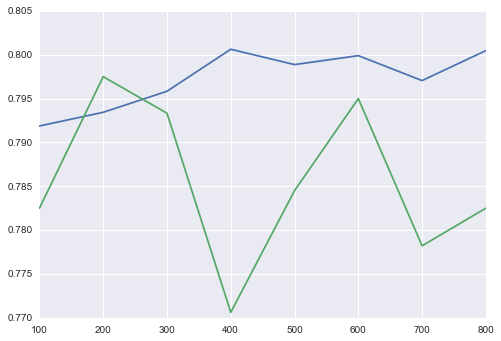

In [944]:
errorMappingXG(100,891,100,['Name_Length','Sex_Num','Title_Num'],10,4,.01)

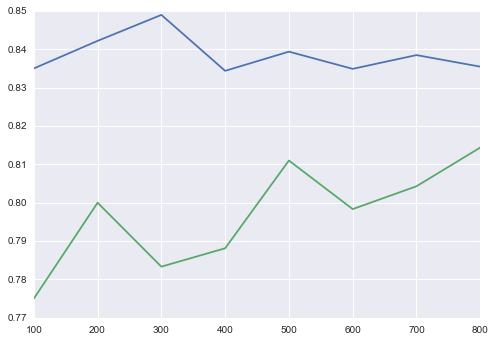

In [945]:
errorMappingXG(100,891,100,['Pclass','SibSp','Parch','Cabin_bin','Name_Length','Age_Bin',
              'Fare_Bin','Sex_Num','Embarked_Num','Title_Num'],10,4,.01)

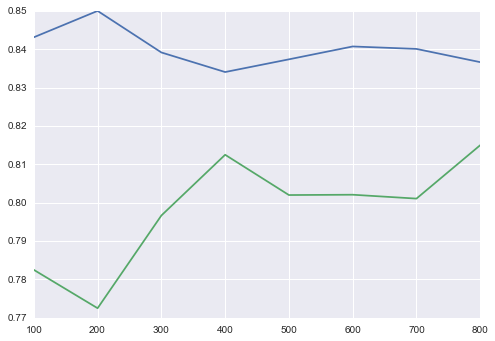

In [946]:
errorMappingXG(100,891,100,['Pclass','SibSp','Parch','Cabin_bin','Name_Length','Age_Bin',
              'Fare_Bin','Sex_Num','Embarked_Num','Title_Num'],20,4,.01)

### Finally, when I have something I want to submit, I put my test set through my model, fomulate for the particular Kaggle competition, and now can submit!

In [947]:
test_X=test_data.iloc[:,2:].as_matrix()
predictionsTest=gbm.predict(test_X)

In [948]:
IDs=test_data['PassengerId']
TitanicXG=np.c_[IDs,predictionsTest]
np.savetxt("titanic_predictionsXG.csv", TitanicXG, delimiter=",",header='PassengerId,Survived')

### Other ideas:
*  Optimizing the parameters in xgboost. (automatic function)
*  Feature binning, what else could be done?
  - Age could be baby, child, teenager, adult, retired